# Day Trading Notebook
<b>Authors: Jared Prior and Miguel Oyler-Castrillo</b>

In [11]:
import urllib3
from bs4 import BeautifulSoup
import bs4
import requests
import re
import time
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

BUFFER_TIME = 0.5
def extract_source(url):
    agent = {"User-Agent":"Mozilla/5.0"}
    source=requests.get(url, headers=agent).text
    return source

In [12]:
def getData(source):
    soup=bs4.BeautifulSoup(source, 'lxml')
    stocks = soup.findAll('tr')
    ids = []
    names = []
    prices = []
    changes = []
    deltas = []
    for stock in stocks:
        td = stock.findAll('td')
        i = 0
        vals = []
        for d in td:
            txt = d.get_text()
            if txt == " " or txt == "" or txt == '' or txt == 'N/A':
                continue
            else:
                vals.append(txt)
        if vals == []:
            del vals
            continue
        else:
            ids.append(vals[0])
            names.append(vals[1])
            prices.append(vals[2])
            changes.append(vals[3])
            deltas.append(vals[4])
    dct_df = {"Identifier":ids,
              "Name":names,
              "Price":prices,
              "Change":changes,
              "Percent Change":deltas}
    df = pd.DataFrame(dct_df, columns = ["Identifier",
                                         "Name",
                                         "Price",
                                         "Change",
                                         "Percent Change"])
    return df

In [13]:
global STOCK_TREND_DICT
STOCK_TREND_DICT = {}
def exists(name):
    if name in STOCK_TREND_DICT:
        return True
    else:
        return False
def row_parser(row):
    company = row['Identifier']
    price = row['Price']
    if not exists(company):
        STOCK_TREND_DICT[company] = []
    STOCK_TREND_DICT[company].append(float(price))

  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.97   +1.59   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.03   +1.78   
2        UAL       United Airlines Holdings, Inc.   37.01   +3.69   
3         BA                   The Boeing Company  180.05  +10.05   
4         GE             General Electric Company    7.10   +0.15   

  Percent Change  
0        +11.02%  
1        +10.35%  
2        +11.06%  
3         +5.91%  
4         +2.19%  


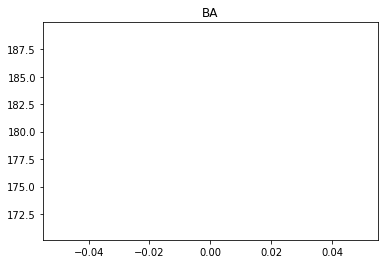

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.96   +1.58   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.03   +1.78   
2        UAL       United Airlines Holdings, Inc.   36.96   +3.64   
3         BA                   The Boeing Company  180.00  +10.00   
4         GE             General Electric Company    7.10   +0.15   

  Percent Change  
0        +10.99%  
1        +10.32%  
2        +10.92%  
3         +5.88%  
4         +2.16%  


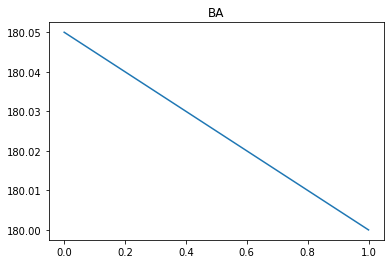

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.96   +1.58   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.01   +1.76   
2        UAL       United Airlines Holdings, Inc.   36.99   +3.67   
3         BA                   The Boeing Company  180.00  +10.00   
4         GE             General Electric Company    7.10   +0.15   

  Percent Change  
0        +10.99%  
1        +10.21%  
2        +11.01%  
3         +5.88%  
4         +2.16%  


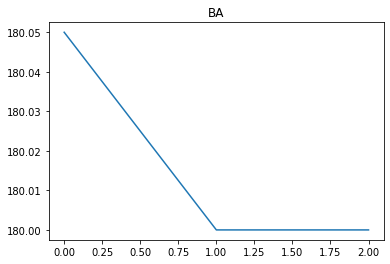

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.97   +1.59   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.03   +1.78   
2        UAL       United Airlines Holdings, Inc.   37.00   +3.68   
3         BA                   The Boeing Company  180.00  +10.00   
4         GE             General Electric Company    7.10   +0.15   

  Percent Change  
0        +11.02%  
1        +10.32%  
2        +11.04%  
3         +5.88%  
4         +2.16%  


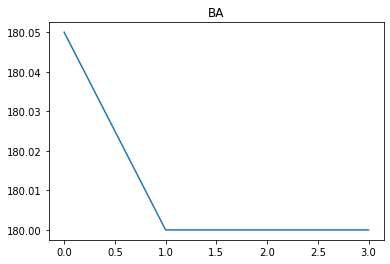

Cash on hand is: 0
  Identifier                                 Name   Price Change  \
0        AAL         American Airlines Group Inc.   16.00  +1.62   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.07  +1.82   
2        UAL       United Airlines Holdings, Inc.   37.04  +3.72   
3         BA                   The Boeing Company  179.94  +9.94   
4         GE             General Electric Company    7.10  +0.15   

  Percent Change  
0        +11.27%  
1        +10.55%  
2        +11.16%  
3         +5.85%  
4         +2.16%  


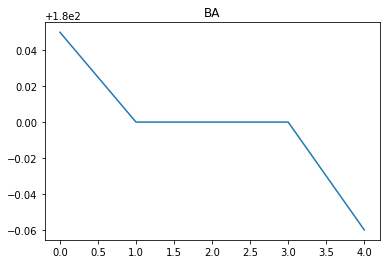

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.97   +1.59   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.01   +1.76   
2        UAL       United Airlines Holdings, Inc.   36.99   +3.67   
3         BA                   The Boeing Company  180.11  +10.11   
4         GE             General Electric Company    7.11   +0.16   

  Percent Change  
0        +11.02%  
1        +10.20%  
2        +11.01%  
3         +5.95%  
4         +2.23%  


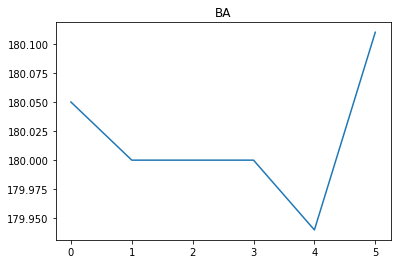

Cash on hand is: 1000.3332407664537
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.01   +1.63   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.06   +1.81   
2        UAL       United Airlines Holdings, Inc.   37.02   +3.70   
3         BA                   The Boeing Company  180.10  +10.10   
4         GE             General Electric Company    7.10   +0.15   

  Percent Change  
0        +11.32%  
1        +10.49%  
2        +11.10%  
3         +5.94%  
4         +2.16%  


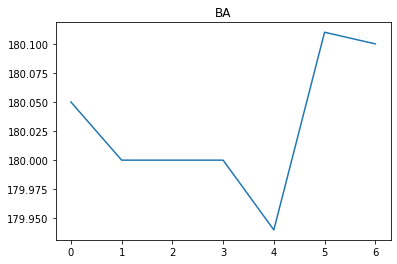

Cash on hand is: 1000.3332407664537
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.95   +1.57   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.00   +1.75   
2        UAL       United Airlines Holdings, Inc.   36.97   +3.65   
3         BA                   The Boeing Company  180.10  +10.10   
4         GE             General Electric Company    7.11   +0.16   

  Percent Change  
0        +10.92%  
1        +10.17%  
2        +10.97%  
3         +5.94%  
4         +2.23%  


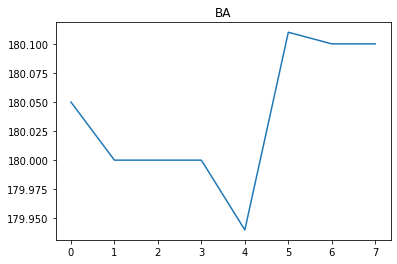

Cash on hand is: 1000.3332407664537
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.94   +1.56   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.00   +1.75   
2        UAL       United Airlines Holdings, Inc.   36.97   +3.65   
3         BA                   The Boeing Company  180.05  +10.05   
4         GE             General Electric Company    7.09   +0.14   

  Percent Change  
0        +10.85%  
1        +10.14%  
2        +10.97%  
3         +5.91%  
4         +2.09%  


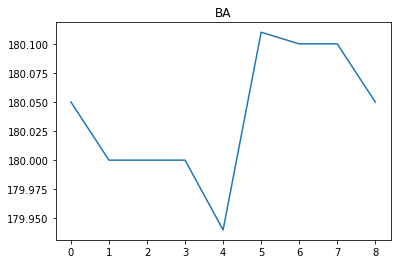

Cash on hand is: 1000.3332407664537
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.93   +1.55   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.00   +1.75   
2        UAL       United Airlines Holdings, Inc.   36.97   +3.65   
3         BA                   The Boeing Company  180.02  +10.02   
4         GE             General Electric Company    7.09   +0.14   

  Percent Change  
0        +10.74%  
1        +10.14%  
2        +10.94%  
3         +5.89%  
4         +2.09%  


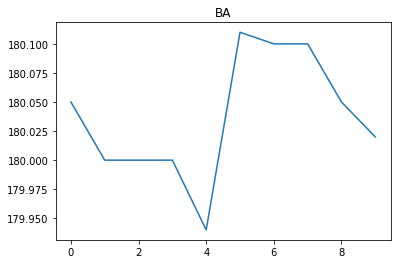

Cash on hand is: 1000.3332407664537
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.96   +1.58   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.06   +1.81   
2        UAL       United Airlines Holdings, Inc.   37.03   +3.71   
3         BA                   The Boeing Company  180.42  +10.42   
4         GE             General Electric Company    7.10   +0.15   

  Percent Change  
0        +10.99%  
1        +10.46%  
2        +11.15%  
3         +6.13%  
4         +2.16%  


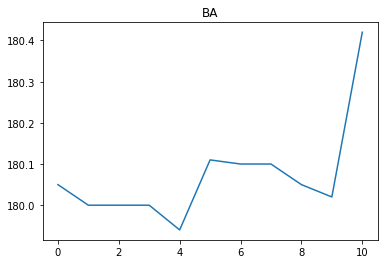

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.96   +1.58   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.04   +1.79   
2        UAL       United Airlines Holdings, Inc.   37.03   +3.71   
3         BA                   The Boeing Company  180.24  +10.24   
4         GE             General Electric Company    7.09   +0.14   

  Percent Change  
0        +10.99%  
1        +10.38%  
2        +11.13%  
3         +6.02%  
4         +2.09%  


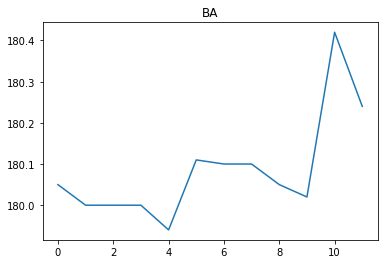

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.98   +1.60   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.03   +1.78   
2        UAL       United Airlines Holdings, Inc.   37.06   +3.74   
3         BA                   The Boeing Company  180.28  +10.28   
4         GE             General Electric Company    7.10   +0.15   

  Percent Change  
0        +11.13%  
1        +10.32%  
2        +11.22%  
3         +6.05%  
4         +2.15%  


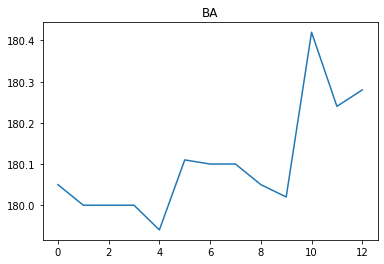

Cash on hand is: 0
  Identifier                                 Name   Price Change  \
0        AAL         American Airlines Group Inc.   15.93  +1.55   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.00  +1.75   
2        UAL       United Airlines Holdings, Inc.   36.97  +3.65   
3         BA                   The Boeing Company  179.85  +9.85   
4         GE             General Electric Company    7.09  +0.14   

  Percent Change  
0        +10.78%  
1        +10.14%  
2        +10.94%  
3         +5.80%  
4         +2.01%  


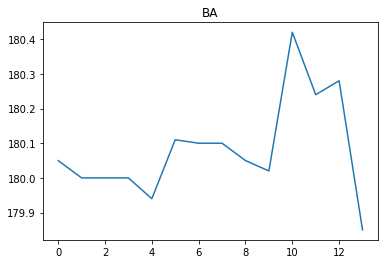

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.00   +1.62   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.07   +1.82   
2        UAL       United Airlines Holdings, Inc.   37.07   +3.75   
3         BA                   The Boeing Company  180.29  +10.29   
4         GE             General Electric Company    7.09   +0.14   

  Percent Change  
0        +11.30%  
1        +10.55%  
2        +11.25%  
3         +6.05%  
4         +2.05%  


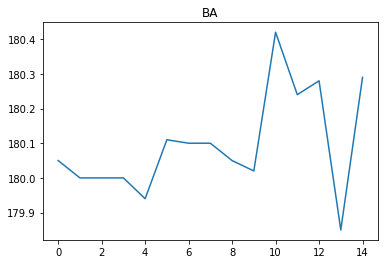

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.97   +1.59   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.04   +1.79   
2        UAL       United Airlines Holdings, Inc.   37.04   +3.72   
3         BA                   The Boeing Company  180.20  +10.20   
4         GE             General Electric Company    7.10   +0.15   

  Percent Change  
0        +11.06%  
1        +10.38%  
2        +11.16%  
3         +6.00%  
4         +2.16%  


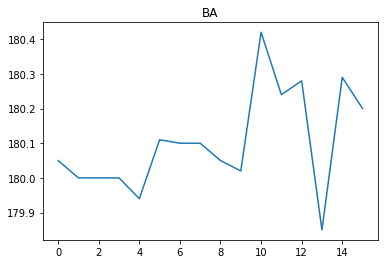

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.00   +1.62   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.06   +1.81   
2        UAL       United Airlines Holdings, Inc.   37.08   +3.76   
3         BA                   The Boeing Company  180.31  +10.31   
4         GE             General Electric Company    7.09   +0.14   

  Percent Change  
0        +11.27%  
1        +10.49%  
2        +11.28%  
3         +6.06%  
4         +2.02%  


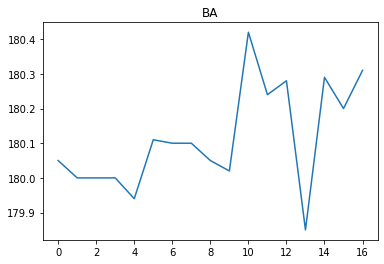

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.97   +1.59   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.04   +1.79   
2        UAL       United Airlines Holdings, Inc.   37.07   +3.75   
3         BA                   The Boeing Company  180.33  +10.33   
4         GE             General Electric Company    7.10   +0.15   

  Percent Change  
0        +11.02%  
1        +10.38%  
2        +11.25%  
3         +6.07%  
4         +2.12%  


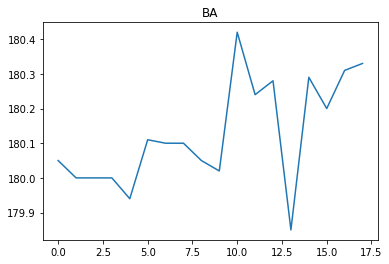

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.98   +1.60   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.03   +1.78   
2        UAL       United Airlines Holdings, Inc.   37.08   +3.76   
3         BA                   The Boeing Company  180.37  +10.37   
4         GE             General Electric Company    7.09   +0.14   

  Percent Change  
0        +11.09%  
1        +10.32%  
2        +11.28%  
3         +6.10%  
4         +2.01%  


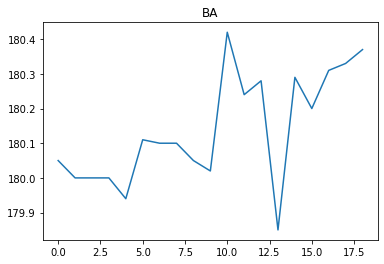

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.98   +1.60   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.03   +1.78   
2        UAL       United Airlines Holdings, Inc.   37.06   +3.74   
3         BA                   The Boeing Company  180.28  +10.28   
4         GE             General Electric Company    7.10   +0.15   

  Percent Change  
0        +11.13%  
1        +10.32%  
2        +11.22%  
3         +6.05%  
4         +2.15%  


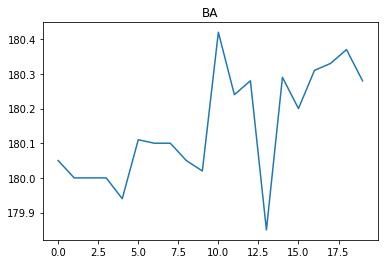

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.99   +1.61   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.03   +1.78   
2        UAL       United Airlines Holdings, Inc.   37.06   +3.74   
3         BA                   The Boeing Company  180.37  +10.37   
4         GE             General Electric Company    7.09   +0.14   

  Percent Change  
0        +11.20%  
1        +10.33%  
2        +11.23%  
3         +6.10%  
4         +2.02%  


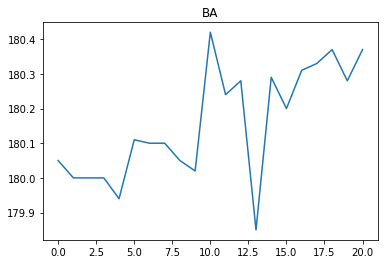

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.98   +1.60   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.03   +1.78   
2        UAL       United Airlines Holdings, Inc.   37.06   +3.74   
3         BA                   The Boeing Company  180.27  +10.27   
4         GE             General Electric Company    7.09   +0.14   

  Percent Change  
0        +11.13%  
1        +10.32%  
2        +11.22%  
3         +6.04%  
4         +2.01%  


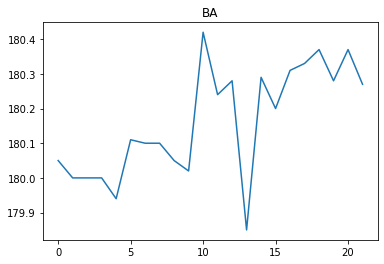

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.96   +1.58   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.01   +1.76   
2        UAL       United Airlines Holdings, Inc.   37.04   +3.72   
3         BA                   The Boeing Company  180.27  +10.27   
4         GE             General Electric Company    7.09   +0.14   

  Percent Change  
0        +10.99%  
1        +10.20%  
2        +11.16%  
3         +6.04%  
4         +2.01%  


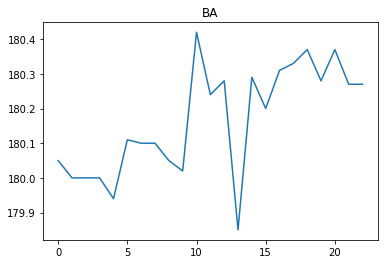

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.96   +1.58   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.01   +1.76   
2        UAL       United Airlines Holdings, Inc.   37.04   +3.72   
3         BA                   The Boeing Company  180.37  +10.37   
4         GE             General Electric Company    7.09   +0.14   

  Percent Change  
0        +10.99%  
1        +10.20%  
2        +11.16%  
3         +6.10%  
4         +2.01%  


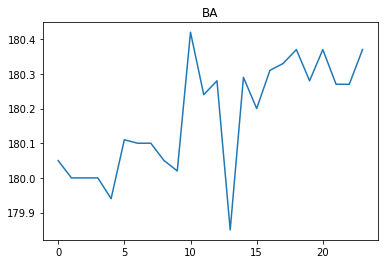

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.97   +1.59   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.04   +1.79   
2        UAL       United Airlines Holdings, Inc.   37.06   +3.74   
3         BA                   The Boeing Company  180.35  +10.35   
4         GE             General Electric Company    7.09   +0.14   

  Percent Change  
0        +11.06%  
1        +10.38%  
2        +11.22%  
3         +6.09%  
4         +2.01%  


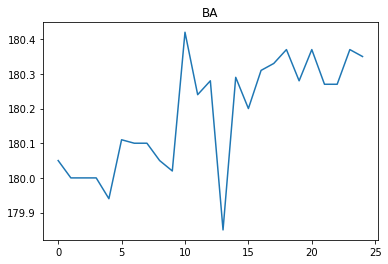

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.99   +1.61   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.03   +1.78   
2        UAL       United Airlines Holdings, Inc.   37.06   +3.74   
3         BA                   The Boeing Company  180.37  +10.37   
4         GE             General Electric Company    7.09   +0.14   

  Percent Change  
0        +11.20%  
1        +10.33%  
2        +11.23%  
3         +6.10%  
4         +2.02%  


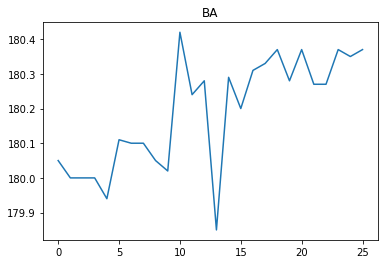

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.96   +1.58   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.01   +1.76   
2        UAL       United Airlines Holdings, Inc.   37.04   +3.72   
3         BA                   The Boeing Company  180.27  +10.27   
4         GE             General Electric Company    7.09   +0.14   

  Percent Change  
0        +10.99%  
1        +10.20%  
2        +11.16%  
3         +6.04%  
4         +2.01%  


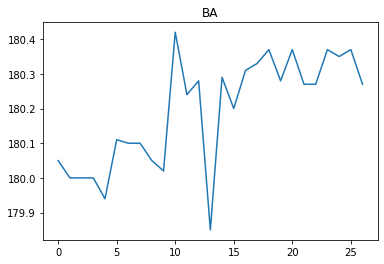

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.97   +1.59   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.04   +1.79   
2        UAL       United Airlines Holdings, Inc.   37.07   +3.75   
3         BA                   The Boeing Company  180.33  +10.33   
4         GE             General Electric Company    7.10   +0.15   

  Percent Change  
0        +11.02%  
1        +10.38%  
2        +11.25%  
3         +6.07%  
4         +2.12%  


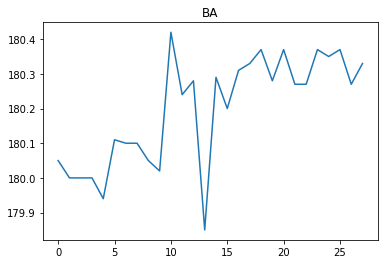

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.95   +1.57   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.04   +1.79   
2        UAL       United Airlines Holdings, Inc.   37.03   +3.71   
3         BA                   The Boeing Company  180.24  +10.24   
4         GE             General Electric Company    7.09   +0.14   

  Percent Change  
0        +10.94%  
1        +10.38%  
2        +11.13%  
3         +6.02%  
4         +2.09%  


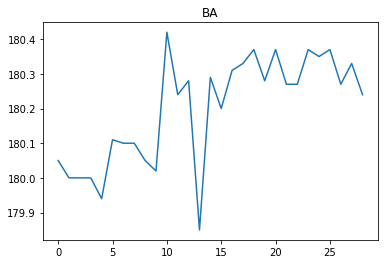

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.04   +1.66   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.10   +1.85   
2        UAL       United Airlines Holdings, Inc.   37.20   +3.88   
3         BA                   The Boeing Company  180.80  +10.80   
4         GE             General Electric Company    7.10   +0.15   

  Percent Change  
0        +11.54%  
1        +10.72%  
2        +11.64%  
3         +6.35%  
4         +2.16%  


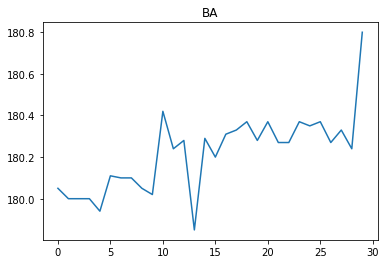

Cash on hand is: 1002.4401392892964
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.00   +1.62   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.07   +1.82   
2        UAL       United Airlines Holdings, Inc.   37.07   +3.75   
3         BA                   The Boeing Company  180.29  +10.29   
4         GE             General Electric Company    7.09   +0.14   

  Percent Change  
0        +11.30%  
1        +10.55%  
2        +11.25%  
3         +6.05%  
4         +2.05%  


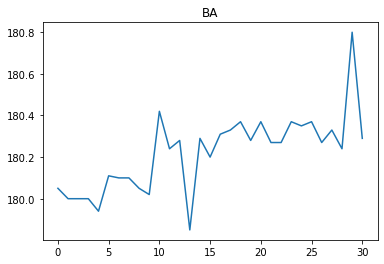

Cash on hand is: 1002.4401392892964
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.03   +1.65   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.09   +1.84   
2        UAL       United Airlines Holdings, Inc.   37.16   +3.84   
3         BA                   The Boeing Company  180.78  +10.78   
4         GE             General Electric Company    7.11   +0.16   

  Percent Change  
0        +11.47%  
1        +10.66%  
2        +11.52%  
3         +6.34%  
4         +2.23%  


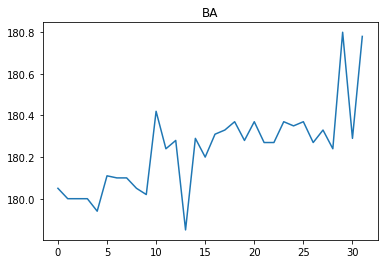

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.98   +1.60   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.03   +1.78   
2        UAL       United Airlines Holdings, Inc.   37.06   +3.74   
3         BA                   The Boeing Company  180.31  +10.31   
4         GE             General Electric Company    7.09   +0.14   

  Percent Change  
0        +11.12%  
1        +10.32%  
2        +11.24%  
3         +6.06%  
4         +2.01%  


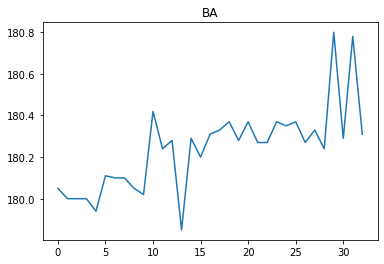

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.96   +1.58   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.01   +1.76   
2        UAL       United Airlines Holdings, Inc.   37.04   +3.72   
3         BA                   The Boeing Company  180.37  +10.37   
4         GE             General Electric Company    7.09   +0.14   

  Percent Change  
0        +10.99%  
1        +10.20%  
2        +11.16%  
3         +6.10%  
4         +2.01%  


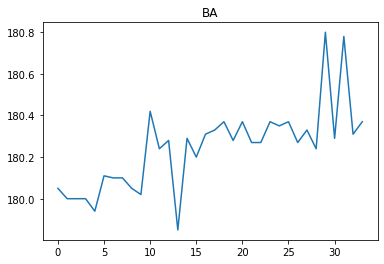

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.03   +1.65   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.10   +1.85   
2        UAL       United Airlines Holdings, Inc.   37.17   +3.85   
3         BA                   The Boeing Company  180.90  +10.90   
4         GE             General Electric Company    7.11   +0.16   

  Percent Change  
0        +11.47%  
1        +10.72%  
2        +11.55%  
3         +6.41%  
4         +2.30%  


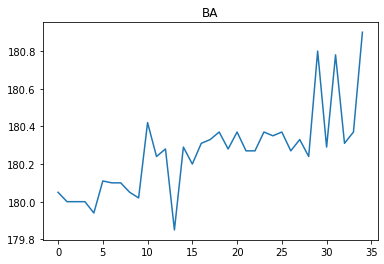

Cash on hand is: 1003.10554927223
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.03   +1.65   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.09   +1.84   
2        UAL       United Airlines Holdings, Inc.   37.14   +3.82   
3         BA                   The Boeing Company  180.84  +10.84   
4         GE             General Electric Company    7.11   +0.16   

  Percent Change  
0        +11.47%  
1        +10.67%  
2        +11.46%  
3         +6.38%  
4         +2.23%  


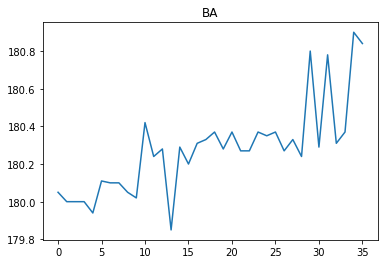

Cash on hand is: 1003.10554927223
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.04   +1.66   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.10   +1.85   
2        UAL       United Airlines Holdings, Inc.   37.20   +3.88   
3         BA                   The Boeing Company  180.80  +10.80   
4         GE             General Electric Company    7.10   +0.15   

  Percent Change  
0        +11.54%  
1        +10.72%  
2        +11.64%  
3         +6.35%  
4         +2.16%  


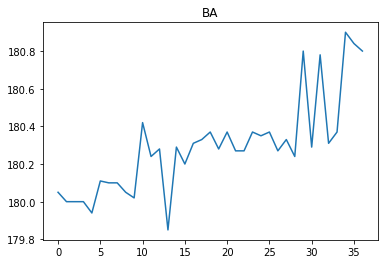

Cash on hand is: 1003.10554927223
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   15.99   +1.61   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.06   +1.81   
2        UAL       United Airlines Holdings, Inc.   37.08   +3.76   
3         BA                   The Boeing Company  180.50  +10.50   
4         GE             General Electric Company    7.09   +0.14   

  Percent Change  
0        +11.17%  
1        +10.46%  
2        +11.29%  
3         +6.18%  
4         +2.09%  


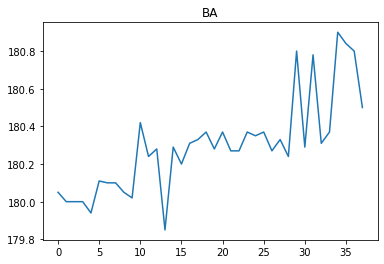

Cash on hand is: 1003.10554927223
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.03   +1.65   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.09   +1.84   
2        UAL       United Airlines Holdings, Inc.   37.16   +3.84   
3         BA                   The Boeing Company  180.78  +10.78   
4         GE             General Electric Company    7.11   +0.16   

  Percent Change  
0        +11.47%  
1        +10.66%  
2        +11.52%  
3         +6.34%  
4         +2.23%  


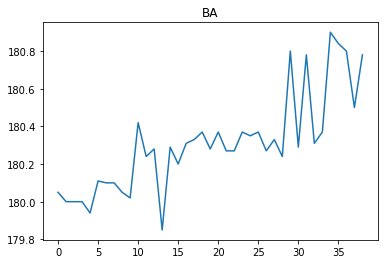

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.09   +1.71   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.12   +1.88   
2        UAL       United Airlines Holdings, Inc.   37.29   +3.97   
3         BA                   The Boeing Company  181.77  +11.77   
4         GE             General Electric Company    7.12   +0.18   

  Percent Change  
0        +11.89%  
1        +10.87%  
2        +11.92%  
3         +6.92%  
4         +2.52%  


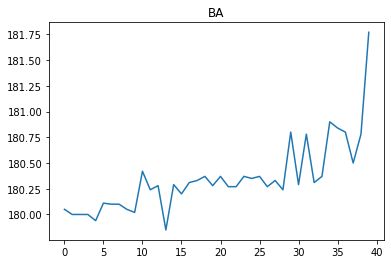

Cash on hand is: 1008.598825595825
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.07   +1.69   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.12   +1.87   
2        UAL       United Airlines Holdings, Inc.   37.28   +3.96   
3         BA                   The Boeing Company  181.72  +11.72   
4         GE             General Electric Company    7.12   +0.18   

  Percent Change  
0        +11.75%  
1        +10.84%  
2        +11.88%  
3         +6.89%  
4         +2.52%  


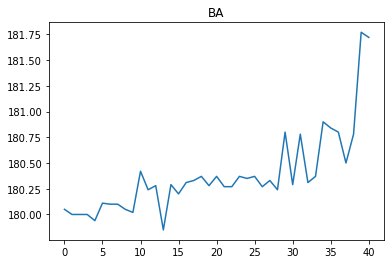

Cash on hand is: 1008.598825595825
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.02   +1.64   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.09   +1.84   
2        UAL       United Airlines Holdings, Inc.   37.16   +3.84   
3         BA                   The Boeing Company  180.75  +10.75   
4         GE             General Electric Company    7.11   +0.16   

  Percent Change  
0        +11.40%  
1        +10.66%  
2        +11.52%  
3         +6.32%  
4         +2.26%  


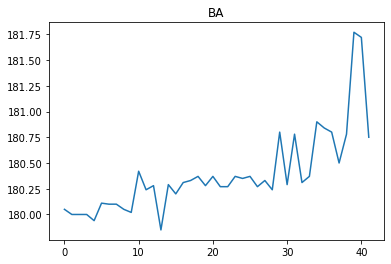

Cash on hand is: 1008.598825595825
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.13   +1.75   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.19   +1.94   
2        UAL       United Airlines Holdings, Inc.   37.38   +4.06   
3         BA                   The Boeing Company  181.82  +11.82   
4         GE             General Electric Company    7.13   +0.18   

  Percent Change  
0        +12.17%  
1        +11.25%  
2        +12.18%  
3         +6.95%  
4         +2.59%  


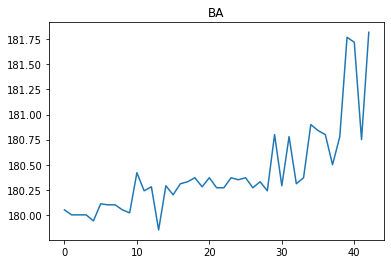

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.09   +1.71   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.18   +1.93   
2        UAL       United Airlines Holdings, Inc.   37.34   +4.02   
3         BA                   The Boeing Company  181.68  +11.68   
4         GE             General Electric Company    7.14   +0.19   

  Percent Change  
0        +11.89%  
1        +11.19%  
2        +12.06%  
3         +6.87%  
4         +2.66%  


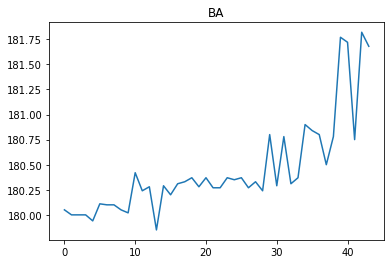

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.09   +1.71   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.18   +1.93   
2        UAL       United Airlines Holdings, Inc.   37.33   +4.01   
3         BA                   The Boeing Company  181.74  +11.74   
4         GE             General Electric Company    7.14   +0.19   

  Percent Change  
0        +11.89%  
1        +11.19%  
2        +12.03%  
3         +6.91%  
4         +2.66%  


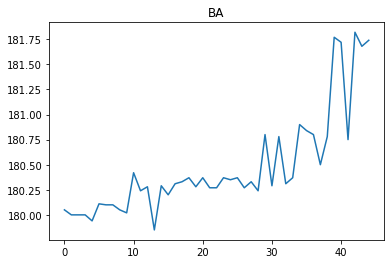

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.09   +1.71   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.17   +1.92   
2        UAL       United Airlines Holdings, Inc.   37.34   +4.02   
3         BA                   The Boeing Company  181.52  +11.52   
4         GE             General Electric Company    7.13   +0.18   

  Percent Change  
0        +11.93%  
1        +11.13%  
2        +12.06%  
3         +6.78%  
4         +2.59%  


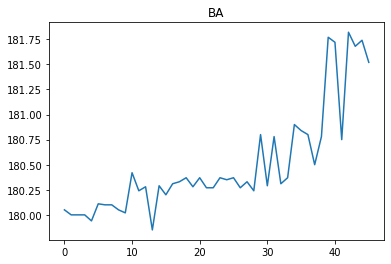

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.08   +1.70   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.16   +1.91   
2        UAL       United Airlines Holdings, Inc.   37.31   +3.99   
3         BA                   The Boeing Company  181.52  +11.52   
4         GE             General Electric Company    7.13   +0.18   

  Percent Change  
0        +11.82%  
1        +11.07%  
2        +11.97%  
3         +6.78%  
4         +2.59%  


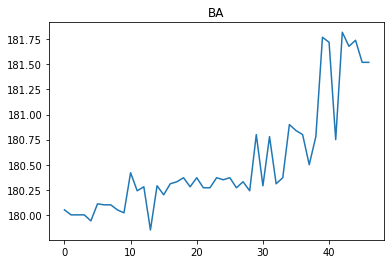

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.14   +1.76   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.16   +1.91   
2        UAL       United Airlines Holdings, Inc.   37.39   +4.07   
3         BA                   The Boeing Company  181.80  +11.80   
4         GE             General Electric Company    7.14   +0.19   

  Percent Change  
0        +12.24%  
1        +11.07%  
2        +12.21%  
3         +6.94%  
4         +2.73%  


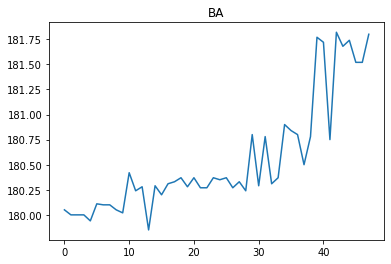

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.14   +1.76   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.17   +1.92   
2        UAL       United Airlines Holdings, Inc.   37.37   +4.05   
3         BA                   The Boeing Company  182.03  +12.03   
4         GE             General Electric Company    7.13   +0.18   

  Percent Change  
0        +12.24%  
1        +11.13%  
2        +12.15%  
3         +7.08%  
4         +2.59%  


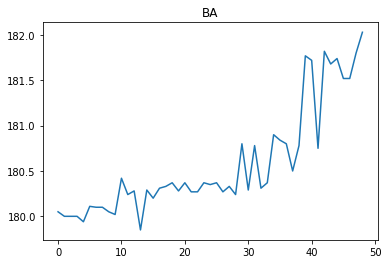

Cash on hand is: 1009.7637455901883
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.14   +1.76   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.19   +1.94   
2        UAL       United Airlines Holdings, Inc.   37.42   +4.10   
3         BA                   The Boeing Company  182.33  +12.33   
4         GE             General Electric Company    7.13   +0.18   

  Percent Change  
0        +12.24%  
1        +11.25%  
2        +12.30%  
3         +7.25%  
4         +2.59%  


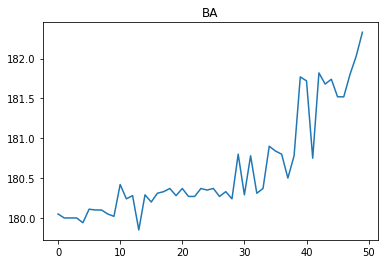

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.08   +1.70   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.17   +1.92   
2        UAL       United Airlines Holdings, Inc.   37.31   +3.99   
3         BA                   The Boeing Company  181.67  +11.67   
4         GE             General Electric Company    7.13   +0.18   

  Percent Change  
0        +11.82%  
1        +11.13%  
2        +11.97%  
3         +6.86%  
4         +2.59%  


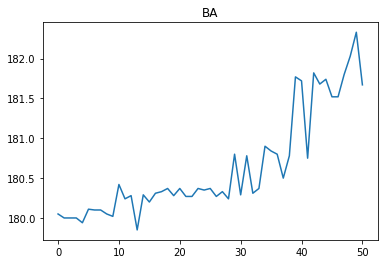

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.06   +1.68   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.10   +1.85   
2        UAL       United Airlines Holdings, Inc.   37.23   +3.91   
3         BA                   The Boeing Company  181.40  +11.40   
4         GE             General Electric Company    7.11   +0.16   

  Percent Change  
0        +11.68%  
1        +10.72%  
2        +11.73%  
3         +6.71%  
4         +2.30%  


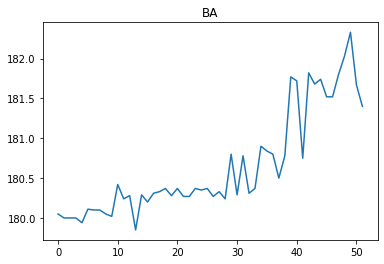

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.13   +1.75   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.16   +1.91   
2        UAL       United Airlines Holdings, Inc.   37.37   +4.05   
3         BA                   The Boeing Company  182.01  +12.01   
4         GE             General Electric Company    7.12   +0.17   

  Percent Change  
0        +12.17%  
1        +11.10%  
2        +12.15%  
3         +7.07%  
4         +2.45%  


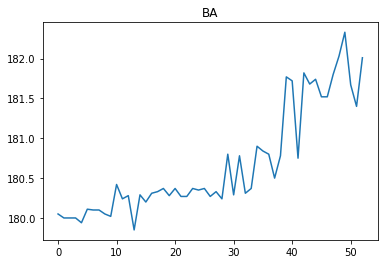

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.08   +1.70   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.16   +1.91   
2        UAL       United Airlines Holdings, Inc.   37.31   +3.99   
3         BA                   The Boeing Company  181.52  +11.52   
4         GE             General Electric Company    7.13   +0.18   

  Percent Change  
0        +11.82%  
1        +11.07%  
2        +11.97%  
3         +6.78%  
4         +2.59%  


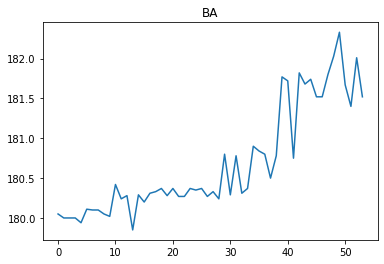

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.15   +1.77   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.15   +1.90   
2        UAL       United Airlines Holdings, Inc.   37.39   +4.07   
3         BA                   The Boeing Company  181.96  +11.96   
4         GE             General Electric Company    7.13   +0.18   

  Percent Change  
0        +12.31%  
1        +11.04%  
2        +12.21%  
3         +7.04%  
4         +2.59%  


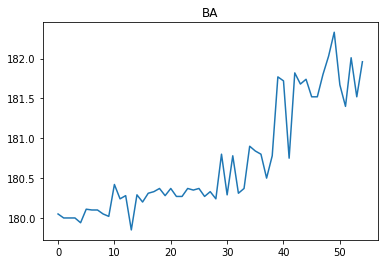

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.09   +1.71   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.18   +1.93   
2        UAL       United Airlines Holdings, Inc.   37.34   +4.02   
3         BA                   The Boeing Company  181.82  +11.82   
4         GE             General Electric Company    7.12   +0.18   

  Percent Change  
0        +11.89%  
1        +11.19%  
2        +12.06%  
3         +6.96%  
4         +2.52%  


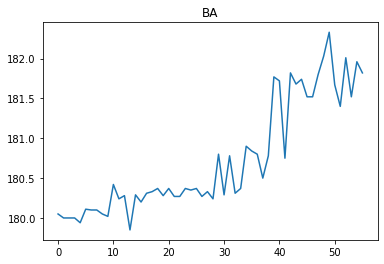

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.14   +1.76   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.17   +1.92   
2        UAL       United Airlines Holdings, Inc.   37.38   +4.06   
3         BA                   The Boeing Company  181.76  +11.76   
4         GE             General Electric Company    7.12   +0.17   

  Percent Change  
0        +12.26%  
1        +11.13%  
2        +12.19%  
3         +6.92%  
4         +2.45%  


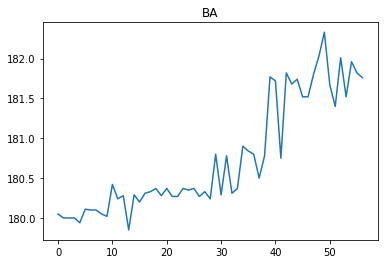

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.14   +1.76   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.19   +1.94   
2        UAL       United Airlines Holdings, Inc.   37.42   +4.10   
3         BA                   The Boeing Company  182.33  +12.33   
4         GE             General Electric Company    7.13   +0.18   

  Percent Change  
0        +12.24%  
1        +11.25%  
2        +12.30%  
3         +7.25%  
4         +2.59%  


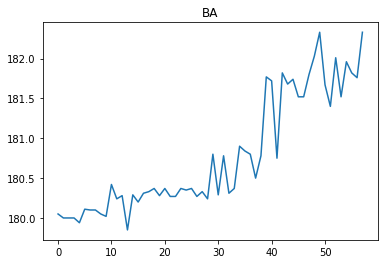

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.13   +1.75   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.10   +1.85   
2        UAL       United Airlines Holdings, Inc.   37.35   +4.03   
3         BA                   The Boeing Company  181.38  +11.38   
4         GE             General Electric Company    7.12   +0.17   

  Percent Change  
0        +12.17%  
1        +10.72%  
2        +12.09%  
3         +6.69%  
4         +2.45%  


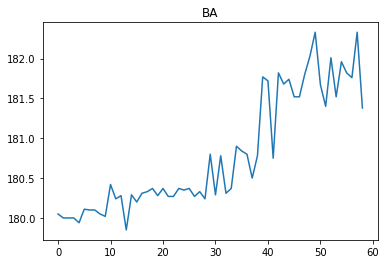

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.10   +1.72   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.08   +1.83   
2        UAL       United Airlines Holdings, Inc.   37.32   +4.00   
3         BA                   The Boeing Company  181.19  +11.19   
4         GE             General Electric Company    7.11   +0.16   

  Percent Change  
0        +11.96%  
1        +10.64%  
2        +12.00%  
3         +6.58%  
4         +2.30%  


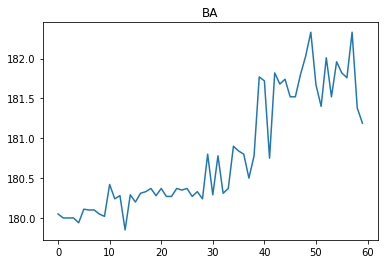

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.15   +1.77   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.15   +1.90   
2        UAL       United Airlines Holdings, Inc.   37.39   +4.07   
3         BA                   The Boeing Company  181.96  +11.96   
4         GE             General Electric Company    7.13   +0.18   

  Percent Change  
0        +12.31%  
1        +11.04%  
2        +12.21%  
3         +7.04%  
4         +2.59%  


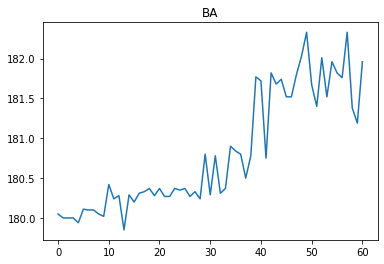

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.09   +1.71   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.08   +1.83   
2        UAL       United Airlines Holdings, Inc.   37.32   +4.00   
3         BA                   The Boeing Company  181.24  +11.24   
4         GE             General Electric Company    7.11   +0.16   

  Percent Change  
0        +11.89%  
1        +10.61%  
2        +12.00%  
3         +6.61%  
4         +2.30%  


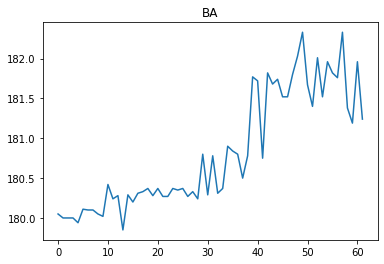

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.10   +1.72   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.11   +1.86   
2        UAL       United Airlines Holdings, Inc.   37.34   +4.02   
3         BA                   The Boeing Company  181.35  +11.35   
4         GE             General Electric Company    7.12   +0.17   

  Percent Change  
0        +11.96%  
1        +10.78%  
2        +12.06%  
3         +6.68%  
4         +2.45%  


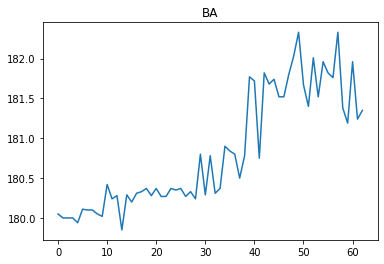

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.11   +1.73   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.13   +1.88   
2        UAL       United Airlines Holdings, Inc.   37.39   +4.07   
3         BA                   The Boeing Company  181.49  +11.49   
4         GE             General Electric Company    7.12   +0.17   

  Percent Change  
0        +12.03%  
1        +10.90%  
2        +12.21%  
3         +6.76%  
4         +2.45%  


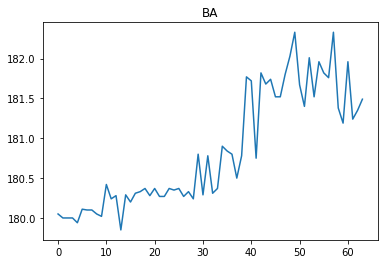

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.12   +1.74   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.11   +1.86   
2        UAL       United Airlines Holdings, Inc.   37.35   +4.03   
3         BA                   The Boeing Company  181.50  +11.50   
4         GE             General Electric Company    7.11   +0.16   

  Percent Change  
0        +12.10%  
1        +10.78%  
2        +12.11%  
3         +6.76%  
4         +2.37%  


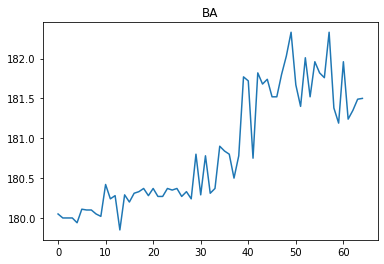

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.10   +1.72   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.11   +1.86   
2        UAL       United Airlines Holdings, Inc.   37.34   +4.02   
3         BA                   The Boeing Company  181.35  +11.35   
4         GE             General Electric Company    7.12   +0.17   

  Percent Change  
0        +11.96%  
1        +10.78%  
2        +12.06%  
3         +6.68%  
4         +2.45%  


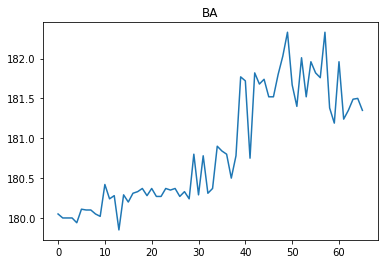

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.12   +1.74   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.11   +1.86   
2        UAL       United Airlines Holdings, Inc.   37.35   +4.03   
3         BA                   The Boeing Company  181.50  +11.50   
4         GE             General Electric Company    7.11   +0.16   

  Percent Change  
0        +12.10%  
1        +10.78%  
2        +12.11%  
3         +6.76%  
4         +2.37%  


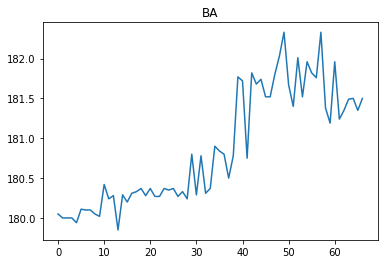

Cash on hand is: 0
  Identifier                                 Name   Price  Change  \
0        AAL         American Airlines Group Inc.   16.17   +1.79   
1       NCLH  Norwegian Cruise Line Holdings Ltd.   19.17   +1.92   
2        UAL       United Airlines Holdings, Inc.   37.44   +4.12   
3         BA                   The Boeing Company  182.10  +12.10   
4         GE             General Electric Company    7.13   +0.18   

  Percent Change  
0        +12.45%  
1        +11.13%  
2        +12.36%  
3         +7.12%  
4         +2.59%  


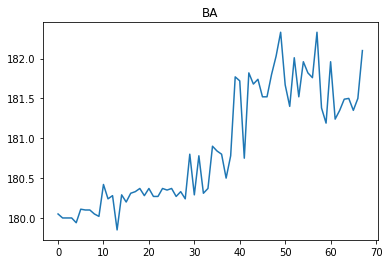

Cash on hand is: 0


In [ ]:
dfs = []
STOCK_TREND_DICT = {}
URL_stem = 'https://finance.yahoo.com/most-active?count=100&offset='
money_amount = 1000
PURCHASED_STOCKS = {}
def construct_slope(pl, window):
    for i in range(5):
        current = pl[-i]
        previous = pl[-(i+1)]
        diff = float(current) - float(previous)
        print(diff)
def check_purchase(ID):
    return ID in PURCHASED_STOCKS
while 1:
    # retrive current moment's data
    offset = 0
    count = 0
    og_df = getData(extract_source(URL_stem + str(offset)))
    last_purchase_price = 0
    while count <1:
        offset+=100
        count+=1
        #create dataframe and add it to log of dataframes
        og_df = pd.concat([og_df,
                           getData(extract_source\
                                   (URL_stem + str(offset)))])
    dfs.append(og_df)
    print(og_df.head())
    og_df.apply(row_parser,axis=1)
    for ID in STOCK_TREND_DICT:
        if ID == 'BA':
            fig, ax = plt.subplots()
            ax.plot(STOCK_TREND_DICT[ID])
            ax.set_title(ID)
            plt.show()

            #analysis
            price_list = STOCK_TREND_DICT[ID]
            #if len(price_list) > 5:
                #construct_slope(price_list, 5)
            if check_purchase(ID):
                if price_list[-1] > PURCHASED_STOCKS[ID][1] and PURCHASED_STOCKS[ID][0] != 0:
                    #sell
                    money_amount += PURCHASED_STOCKS[ID][0] * price_list[-1]
                    last_purchase_price = price_list[-1]
                    PURCHASED_STOCKS[ID] = (0, 0)
                else:
                    if price_list[-1] < last_purchase_price\
                    or price_list[-1] > price_list[-2] and PURCHASED_STOCKS[ID][0] == 0:
                        #buy
                        shares = money_amount/price_list[-1]
                        money_amount = 0
                        PURCHASED_STOCKS[ID]=(shares,price_list[-1])
            else:
                if price_list[-1] == min(price_list):
                    #buy
                    shares = money_amount/price_list[-1]
                    money_amount = 0
                    PURCHASED_STOCKS[ID] = (shares, price_list[-1])
    print("Cash on hand is: " + str(money_amount))
    time.sleep(BUFFER_TIME)